In [205]:
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
import pandas as pd
# Importing data for our chosen portfolio
portfolio = pd.read_csv("top10_long_only.csv")
portfolio["period_end"] = pd.to_datetime(portfolio["period_end"])
# Importing data to get its names
df = pd.read_csv("new_data.csv")

counts = portfolio.groupby("period_end").size()
last_ava_date = counts[counts >= 10].index.max()
current_portfolio = portfolio[portfolio["period_end"] == last_ava_date].sort_values("rank")
current_permnos = current_portfolio["PERMNO"].unique()
# filter mask
permno_mask = df["PERMNO"].isin(current_permnos)
filtered_df = df[permno_mask]
filtered_df["conm"].unique()

filtered_df.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,LINKTYPE,LPERMCO,PERMNO,PERMCO,YYYYMM,MthCalDt,MthPrc,MthRet,MthRetx,ShrOut
2803,187164,2013-12-31,2013,INDL,C,D,STD,HMST,HOMESTREET INC,USD,...,LC,54001,13278.0,54001.0,201312.0,2013-12-31,20.00,-0.054820,-0.054820,14800.0
2804,187164,2014-12-31,2014,INDL,C,D,STD,HMST,HOMESTREET INC,USD,...,LC,54001,13278.0,54001.0,201412.0,2014-12-31,17.41,0.067443,0.067443,14857.0
2805,187164,2015-12-31,2015,INDL,C,D,STD,HMST,HOMESTREET INC,USD,...,LC,54001,13278.0,54001.0,201512.0,2015-12-31,21.71,0.001846,0.001846,22077.0
2806,187164,2016-12-31,2016,INDL,C,D,STD,HMST,HOMESTREET INC,USD,...,LC,54001,13278.0,54001.0,201612.0,2016-12-30,31.60,0.087780,0.087780,26800.0
2807,187164,2017-12-31,2017,INDL,C,D,STD,HMST,HOMESTREET INC,USD,...,LC,54001,13278.0,54001.0,201712.0,2017-12-29,28.95,-0.050820,-0.050820,26888.0


In [207]:
# start from filtered_df, avoid SettingWithCopyWarning
portfolio_data = (filtered_df[["MthCalDt", "conm", "MthPrc"]].copy().rename(columns={"MthCalDt": "Date", "conm": "Firm", "MthPrc": "Annual Price"}))
# make sure Date is datetime
portfolio_data["Date"] = pd.to_datetime(portfolio_data["Date"])

# pivot: rows = Date, columns = Firm, values = Annual Price
price_wide = portfolio_data.pivot_table(index="Date", columns="Firm", values="Annual Price", aggfunc="last").sort_index()
# 
price_wide.loc["2013-12-31", "AMERICAN AIRLINES GROUP INC"] = 25.25
price_wide


Firm,COHERUS ONCOLOGY INC,EMERGENT BIOSOLUTIONS INC,ENPHASE ENERGY INC,FOSSIL GROUP INC,GANNETT CO INC,HOMESTREET INC,LIVEPERSON INC,LUMEN TECHNOLOGIES INC,NEKTAR THERAPEUTICS,SUNRUN INC,AMERICAN AIRLINES GROUP INC
Date,,,,,,,,,,,
2000-12-29,NaN,NaN,NaN,14.48438,NaN,NaN,NaN,35.75,50.500,NaN,NaN
2001-12-31,NaN,NaN,NaN,21.00000,NaN,NaN,0.33,32.80,18.550,NaN,NaN
2002-12-31,NaN,NaN,NaN,20.34000,NaN,NaN,0.94,29.38,8.080,NaN,NaN
2003-12-31,NaN,NaN,NaN,28.13000,NaN,NaN,5.00,32.62,13.610,NaN,NaN
2004-12-31,NaN,NaN,NaN,25.64000,NaN,NaN,3.15,35.47,20.240,NaN,NaN
2005-12-30,NaN,NaN,NaN,21.51000,NaN,NaN,5.61,33.16,16.460,NaN,NaN
2006-12-29,NaN,NaN,NaN,22.58000,NaN,NaN,5.23,43.66,15.210,NaN,NaN
2007-12-31,NaN,5.06,NaN,41.98000,NaN,NaN,5.34,41.46,6.710,NaN,NaN
2008-12-31,NaN,26.11,NaN,16.70000,NaN,NaN,1.82,27.33,5.560,NaN,NaN


<Axes: xlabel='Date'>

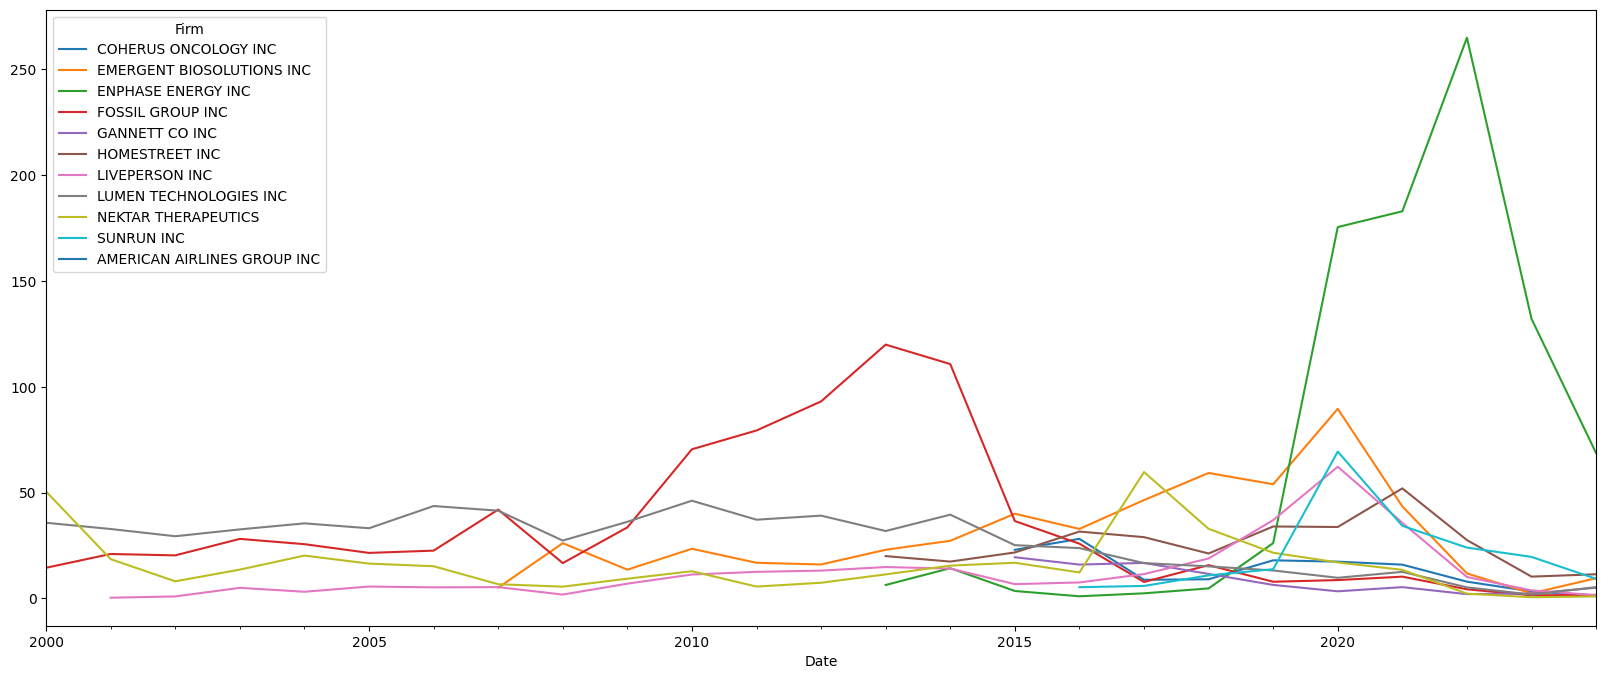

In [208]:
plt.figure(figsize=(20, 8))
price_wide.plot(ax=plt.gca(), legend = True)